<a href="https://colab.research.google.com/github/MikeDeecode/US-accidental--drugs-death-analysis/blob/master/US_accidental_drugs_death.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data set used in this project was obtained from https://www.data.gov/

## **THE DATASET CONTAINS THE DATA OF ACCIDENTAL DRUGS RELATED DEATH IN THE US FROM 2012 TO 2016**

---



I analysed the data to get more insights 

# **DATA CLEANING**

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

Here i loaded the dataset into my notebook using the ID column as my index column

In [2]:
death_from_drugs = pd.read_csv("/content/Accidental_Drug_Related_Deaths_2012-2018.csv", index_col = 0)
print ("Data loaded successfully")

Data loaded successfully


Viewing the dataset 

In [3]:
death_from_drugs.head()

,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,Location,LocationifOther,DescriptionofInjury,InjuryPlace,InjuryCity,InjuryCounty,InjuryState,COD,OtherSignifican,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14-0273,06/28/2014 12:00:00 AM,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,substance,NaN,NaN,NaN,NaN,"Acute fent, hydrocod, benzodiazepine",NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,FAIRFIELD,Hospital,NaN,NaN,NaN,NaN,NaN,NaN,Cocaine Intoxication,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,NaN,Hospital,NaN,Substance Abuse,Unknown,UNKNOWN,NaN,NaN,Acute Heroin and Cocaine Intoxication,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,NaN,Hospital,NaN,substance abuse,Residence,RYE,NaN,NaN,Acute Fentanyl and Morphine Intoxication,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,FAIRFIELD,Hospital,NaN,Transdermal Absorption,Other,NaN,NaN,NaN,Fentanyl Intoxication,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


At first glance, I noticed that the data contains some amounts of missing values that might deter me from effectively analysing the data. These missing values will be dealt with later 

Dropping the columns that are of no use to my analysis 

In [0]:
death_from_drugs.drop(columns = ['DateType', 'ResidenceCounty', 'DeathCounty', 'LocationifOther', 'InjuryCity', 'InjuryCounty', 'InjuryState', 'OtherSignifican', 'FentanylAnalogue', 'Oxycodone',
'Oxymorphone', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Morphine_NotHeroin', 'Hydromorphone', 'Other', 'OpiateNOS', 
'DeathCityGeo', 'ResidenceCityGeo', 'InjuryCityGeo'], axis = 1, inplace = True)

In [5]:
death_from_drugs.head()

,Date,Age,Sex,Race,ResidenceCity,ResidenceState,DeathCity,Location,DescriptionofInjury,InjuryPlace,COD,Heroin,Cocaine,Fentanyl,Ethanol,Amphet,Tramad,AnyOpioid,MannerofDeath
ID,,,,,,,,,,,,,,,,,,,
14-0273,06/28/2014 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,substance,NaN,"Acute fent, hydrocod, benzodiazepine",NaN,NaN,Y,NaN,NaN,NaN,NaN,Accident
13-0102,03/21/2013 12:00:00 AM,48.0,Male,Black,NORWALK,NaN,NORWALK,Hospital,NaN,NaN,Cocaine Intoxication,NaN,Y,NaN,NaN,NaN,NaN,NaN,Accident
16-0165,03/13/2016 12:00:00 AM,30.0,Female,White,SANDY HOOK,CT,DANBURY,Hospital,Substance Abuse,Unknown,Acute Heroin and Cocaine Intoxication,Y,Y,NaN,NaN,NaN,NaN,Y,Accident
16-0208,03/31/2016 12:00:00 AM,23.0,Male,White,RYE,NY,GREENWICH,Hospital,substance abuse,Residence,Acute Fentanyl and Morphine Intoxication,Y,NaN,Y,NaN,NaN,NaN,Y,Accident
13-0052,02/13/2013 12:00:00 AM,22.0,Male,"Asian, Other",FLUSHING,NaN,GREENWICH,Hospital,Transdermal Absorption,Other,Fentanyl Intoxication,NaN,NaN,Y,NaN,NaN,NaN,NaN,Accident


Here we deal with missing values and make every adjustment we need to make to the data 

In [6]:
death_from_drugs['Age'].unique()

array([nan, 48., 30., 23., 22., 21., 40., 50., 26., 49., 29., 45., 42.,
       54., 32., 47., 39., 27., 34., 25., 51., 35., 43., 55., 56., 28.,
       67., 36., 52., 61., 53., 41., 31., 57., 24., 37., 38., 58., 59.,
       46., 64., 60., 44., 33., 20., 19., 66., 63., 62., 65., 71., 73.,
       68., 69., 75., 72., 18., 15., 70., 17., 74., 84., 14., 87., 81.,
       16.])

Here I created the Age group colum to better understabd the data

In [0]:
bins = [0, 18, 64, 100]
labels = ('Minor', 'Adult', 'Senior')
death_from_drugs['Age group'] = pd.cut(death_from_drugs['Age'], bins = bins, labels = labels, right = False)

In [8]:
death_from_drugs.head()

,Date,Age,Sex,Race,ResidenceCity,ResidenceState,DeathCity,Location,DescriptionofInjury,InjuryPlace,COD,Heroin,Cocaine,Fentanyl,Ethanol,Amphet,Tramad,AnyOpioid,MannerofDeath,Age group
ID,,,,,,,,,,,,,,,,,,,,
14-0273,06/28/2014 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,substance,NaN,"Acute fent, hydrocod, benzodiazepine",NaN,NaN,Y,NaN,NaN,NaN,NaN,Accident,NaN
13-0102,03/21/2013 12:00:00 AM,48.0,Male,Black,NORWALK,NaN,NORWALK,Hospital,NaN,NaN,Cocaine Intoxication,NaN,Y,NaN,NaN,NaN,NaN,NaN,Accident,Adult
16-0165,03/13/2016 12:00:00 AM,30.0,Female,White,SANDY HOOK,CT,DANBURY,Hospital,Substance Abuse,Unknown,Acute Heroin and Cocaine Intoxication,Y,Y,NaN,NaN,NaN,NaN,Y,Accident,Adult
16-0208,03/31/2016 12:00:00 AM,23.0,Male,White,RYE,NY,GREENWICH,Hospital,substance abuse,Residence,Acute Fentanyl and Morphine Intoxication,Y,NaN,Y,NaN,NaN,NaN,Y,Accident,Adult
13-0052,02/13/2013 12:00:00 AM,22.0,Male,"Asian, Other",FLUSHING,NaN,GREENWICH,Hospital,Transdermal Absorption,Other,Fentanyl Intoxication,NaN,NaN,Y,NaN,NaN,NaN,NaN,Accident,Adult


Here I dropped all the missing values 

In [0]:
death_from_drugs.dropna(subset = ['Date', 'Age', 'Sex', 'Race', 'ResidenceCity', 'ResidenceState', 'DeathCity', 'Location', 'DescriptionofInjury', 'InjuryPlace', 'COD', 'MannerofDeath'],
                        axis = 0, inplace = True)

In [10]:
death_from_drugs.head()

,Date,Age,Sex,Race,ResidenceCity,ResidenceState,DeathCity,Location,DescriptionofInjury,InjuryPlace,COD,Heroin,Cocaine,Fentanyl,Ethanol,Amphet,Tramad,AnyOpioid,MannerofDeath,Age group
ID,,,,,,,,,,,,,,,,,,,,
16-0165,03/13/2016 12:00:00 AM,30.0,Female,White,SANDY HOOK,CT,DANBURY,Hospital,Substance Abuse,Unknown,Acute Heroin and Cocaine Intoxication,Y,Y,NaN,NaN,NaN,NaN,Y,Accident,Adult
16-0208,03/31/2016 12:00:00 AM,23.0,Male,White,RYE,NY,GREENWICH,Hospital,substance abuse,Residence,Acute Fentanyl and Morphine Intoxication,Y,NaN,Y,NaN,NaN,NaN,Y,Accident,Adult
16-0028,01/13/2016 12:00:00 AM,29.0,Male,Black,NEW HAVEN,CT,NEW HAVEN,Residence,Substance Abuse,Residence,Acute Heroin Intoxication in a Person Taking C...,Y,NaN,NaN,NaN,Y,NaN,Y,Accident,Adult
16-0065,01/30/2016 12:00:00 AM,54.0,Male,White,MIDDLETOWN,CT,MIDDLETOWN,Residence,Substance Abuse Including Injection of Heroin,Residence,"Acute Heroin Intoxication While Using Alcohol,...",Y,NaN,NaN,Y,NaN,NaN,Y,Accident,Adult
16-0688,10/07/2016 12:00:00 AM,34.0,Male,White,COS COB,CT,COS COB,Residence,Substance Abuse,Residence,Acute Intoxication due to the Combined Effects...,Y,NaN,Y,NaN,NaN,NaN,Y,Accident,Adult


In [11]:
death_from_drugs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2815 entries, 16-0165 to 16-0637
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Date                 2815 non-null   object  
 1   Age                  2815 non-null   float64 
 2   Sex                  2815 non-null   object  
 3   Race                 2815 non-null   object  
 4   ResidenceCity        2815 non-null   object  
 5   ResidenceState       2815 non-null   object  
 6   DeathCity            2815 non-null   object  
 7   Location             2815 non-null   object  
 8   DescriptionofInjury  2815 non-null   object  
 9   InjuryPlace          2815 non-null   object  
 10  COD                  2815 non-null   object  
 11  Heroin               1290 non-null   object  
 12  Cocaine              896 non-null    object  
 13  Fentanyl             1807 non-null   object  
 14  Ethanol              750 non-null    object  
 15  Amphet           

Then I converted the columns that are in the wrong format 

In [0]:
death_from_drugs['Date'] = pd.to_datetime(death_from_drugs['Date'], errors = 'coerce')
death_from_drugs['Age'] = death_from_drugs['Age'].astype('int')
death_from_drugs['Sex'] = death_from_drugs['Sex'].astype('category')
death_from_drugs['Race'] = death_from_drugs['Race'].astype('category')

In [13]:
death_from_drugs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2815 entries, 16-0165 to 16-0637
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 2815 non-null   datetime64[ns]
 1   Age                  2815 non-null   int64         
 2   Sex                  2815 non-null   category      
 3   Race                 2815 non-null   category      
 4   ResidenceCity        2815 non-null   object        
 5   ResidenceState       2815 non-null   object        
 6   DeathCity            2815 non-null   object        
 7   Location             2815 non-null   object        
 8   DescriptionofInjury  2815 non-null   object        
 9   InjuryPlace          2815 non-null   object        
 10  COD                  2815 non-null   object        
 11  Heroin               1290 non-null   object        
 12  Cocaine              896 non-null    object        
 13  Fentanyl             1807 non

I created a function to help me with replacing some values in my data. This helps in making my code short and I dont have to write repetitive codes 

In [0]:
def replace_nan(column_to_replace):
  replaced_values = column_to_replace.replace(to_replace = np.nan, value = 'N', inplace = True)
  return replaced_values

In [0]:
replace_nan(death_from_drugs['Heroin'])
replace_nan(death_from_drugs['Cocaine'])
replace_nan(death_from_drugs['Fentanyl'])
replace_nan(death_from_drugs['Ethanol'])
replace_nan(death_from_drugs['Amphet'])
replace_nan(death_from_drugs['Tramad'])
replace_nan(death_from_drugs['AnyOpioid'])

In [16]:
death_from_drugs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2815 entries, 16-0165 to 16-0637
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 2815 non-null   datetime64[ns]
 1   Age                  2815 non-null   int64         
 2   Sex                  2815 non-null   category      
 3   Race                 2815 non-null   category      
 4   ResidenceCity        2815 non-null   object        
 5   ResidenceState       2815 non-null   object        
 6   DeathCity            2815 non-null   object        
 7   Location             2815 non-null   object        
 8   DescriptionofInjury  2815 non-null   object        
 9   InjuryPlace          2815 non-null   object        
 10  COD                  2815 non-null   object        
 11  Heroin               2815 non-null   object        
 12  Cocaine              2815 non-null   object        
 13  Fentanyl             2815 non

I have successfully cleaned the data and there are no missing values 

In [17]:
death_from_drugs.head()

,Date,Age,Sex,Race,ResidenceCity,ResidenceState,DeathCity,Location,DescriptionofInjury,InjuryPlace,COD,Heroin,Cocaine,Fentanyl,Ethanol,Amphet,Tramad,AnyOpioid,MannerofDeath,Age group
ID,,,,,,,,,,,,,,,,,,,,
16-0165,2016-03-13,30,Female,White,SANDY HOOK,CT,DANBURY,Hospital,Substance Abuse,Unknown,Acute Heroin and Cocaine Intoxication,Y,Y,N,N,N,N,Y,Accident,Adult
16-0208,2016-03-31,23,Male,White,RYE,NY,GREENWICH,Hospital,substance abuse,Residence,Acute Fentanyl and Morphine Intoxication,Y,N,Y,N,N,N,Y,Accident,Adult
16-0028,2016-01-13,29,Male,Black,NEW HAVEN,CT,NEW HAVEN,Residence,Substance Abuse,Residence,Acute Heroin Intoxication in a Person Taking C...,Y,N,N,N,Y,N,Y,Accident,Adult
16-0065,2016-01-30,54,Male,White,MIDDLETOWN,CT,MIDDLETOWN,Residence,Substance Abuse Including Injection of Heroin,Residence,"Acute Heroin Intoxication While Using Alcohol,...",Y,N,N,Y,N,N,Y,Accident,Adult
16-0688,2016-10-07,34,Male,White,COS COB,CT,COS COB,Residence,Substance Abuse,Residence,Acute Intoxication due to the Combined Effects...,Y,N,Y,N,N,N,Y,Accident,Adult


One more thing: I noticed the Manner of death column has a problem with case so I dealt with it 

In [18]:
death_from_drugs['MannerofDeath'].unique()

array(['Accident', 'accident'], dtype=object)

In [0]:
death_from_drugs['MannerofDeath'].replace(to_replace = 'accident', value = 'Accident', inplace = True)

# **ANALYSIS AND INSIGHTS**

First I defined a function to show me the death toll of each category

In [0]:
def to_deathtoll(group):
  changed_field = group.rename(columns = {'Sex': 'Death toll'}, inplace = True)
  return changed_field

### Deeath toll by Age group

In [21]:
age_group = death_from_drugs.groupby('Age group', as_index = False)['Sex'].count()
to_deathtoll(age_group)
age_group = age_group.sort_values('Death toll', ascending = True)
age_group

,Age group,Death toll
0,Minor,6
2,Senior,93
1,Adult,2716


From the above table, It is obvious that Adults between the ages of 18 and 65 had the highest death toll

### Death toll by Age group and race 

In [22]:
age_group_race = death_from_drugs.groupby(['Age group', 'Race'], as_index = False)['Sex'].count()
to_deathtoll(age_group_race)
age_group_race.replace(to_replace = np.nan, value = 'None', inplace = True)
age_group_race

agr_pivot = age_group_race.pivot(index = 'Age group', columns = 'Race', values = 'Death toll')
agr_pivot

Race,Asian Indian,"Asian, Other",Black,Chinese,Hawaiian,"Hispanic, Black","Hispanic, White",Other,Unknown,White
Age group,,,,,,,,,,
Minor,None,None,None,None,None,None,1,None,None,5
Adult,13,11,244,1,1,14,303,6,13,2110
Senior,None,None,17,None,None,2,10,None,None,64


We can see how many people died in each category. The white adults have the highest death toll here 

### Death toll by race 

In [23]:
race_grp = death_from_drugs.groupby('Race', as_index = False)["Sex"].count()
to_deathtoll(race_grp)
race_grp = race_grp.sort_values('Death toll', ascending = True)
race_grp

,Race,Death toll
3,Chinese,1
4,Hawaiian,1
7,Other,6
1,"Asian, Other",11
0,Asian Indian,13
8,Unknown,13
5,"Hispanic, Black",16
2,Black,261
6,"Hispanic, White",314
9,White,2179


The whites have the highest death toll by race 

Determining the City with the highest death toll

In [24]:
deathcity_grp = death_from_drugs.groupby('DeathCity', as_index = False)['Sex'].count()
to_deathtoll(deathcity_grp)
deathcity_grp.sort_values('Death toll', ascending = False)

,DeathCity,Death toll
69,HARTFORD,328
101,NEW HAVEN,199
15,BRIDGEPORT,199
171,WATERBURY,194
97,NEW BRITAIN,137
...,...,...
57,FRANKLIN,1
157,TAFTVILLE,1
158,TARIFFVILLE,1
161,THOMPSON,1


Hartford has the highest death toll 

### Death toll by death location 

In [25]:
location_grp = death_from_drugs.groupby('Location', as_index =  False)['Sex'].count()
to_deathtoll(location_grp)
location_grp = location_grp.sort_values('Death toll', ascending = False)
location_grp

,Location,Death toll
4,Residence,1544
1,Hospital,877
3,Other,392
0,Hospice,1
2,Nursing Home,1


As we can see, more most people died in their residence 

This analysis gives me more insight into the accidental death from drugs in the United States. I was able to deduce the race, gender, city and age group with the highest death tolls. 

# **DATA VISUALISATION**

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
death_from_drugs.head()

,Date,Age,Sex,Race,ResidenceCity,ResidenceState,DeathCity,Location,DescriptionofInjury,InjuryPlace,COD,Heroin,Cocaine,Fentanyl,Ethanol,Amphet,Tramad,AnyOpioid,MannerofDeath,Age group
ID,,,,,,,,,,,,,,,,,,,,
16-0165,2016-03-13,30,Female,White,SANDY HOOK,CT,DANBURY,Hospital,Substance Abuse,Unknown,Acute Heroin and Cocaine Intoxication,Y,Y,N,N,N,N,Y,Accident,Adult
16-0208,2016-03-31,23,Male,White,RYE,NY,GREENWICH,Hospital,substance abuse,Residence,Acute Fentanyl and Morphine Intoxication,Y,N,Y,N,N,N,Y,Accident,Adult
16-0028,2016-01-13,29,Male,Black,NEW HAVEN,CT,NEW HAVEN,Residence,Substance Abuse,Residence,Acute Heroin Intoxication in a Person Taking C...,Y,N,N,N,Y,N,Y,Accident,Adult
16-0065,2016-01-30,54,Male,White,MIDDLETOWN,CT,MIDDLETOWN,Residence,Substance Abuse Including Injection of Heroin,Residence,"Acute Heroin Intoxication While Using Alcohol,...",Y,N,N,Y,N,N,Y,Accident,Adult
16-0688,2016-10-07,34,Male,White,COS COB,CT,COS COB,Residence,Substance Abuse,Residence,Acute Intoxication due to the Combined Effects...,Y,N,Y,N,N,N,Y,Accident,Adult


### DISTRIBUTION OF AGE GROUP IN THE DATA

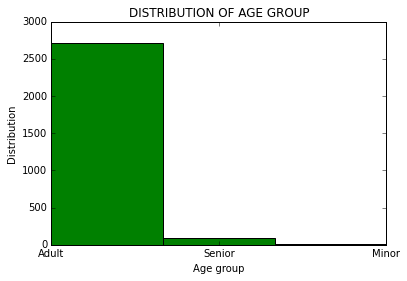

In [37]:
fig = plt.figure()
plt.hist(death_from_drugs['Age group'], bins = 3, color = 'green')
plt.title("DISTRIBUTION OF AGE GROUP")
plt.xlabel("Age group")
plt.ylabel("Distribution")
plt.savefig('out.png')
plt.show()

## BAR CHART SHOWING THE DEATH TOLL BY RACE 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

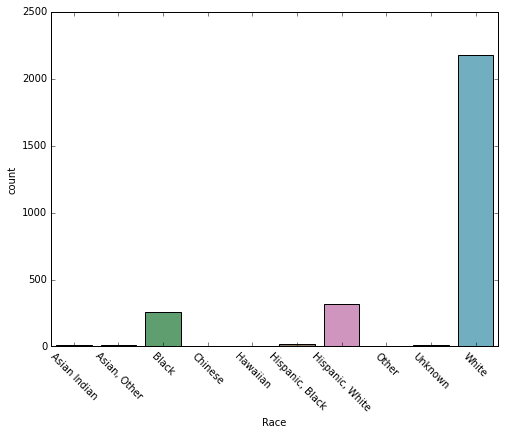

In [47]:
fig = plt.figure(figsize = (8, 6))
sns.countplot(x = 'Race', data = death_from_drugs, palette = 'deep')
plt.xticks(rotation = -45)

BAR CHART SHOWING DEATH TOLL BY RESIDENCE STATE

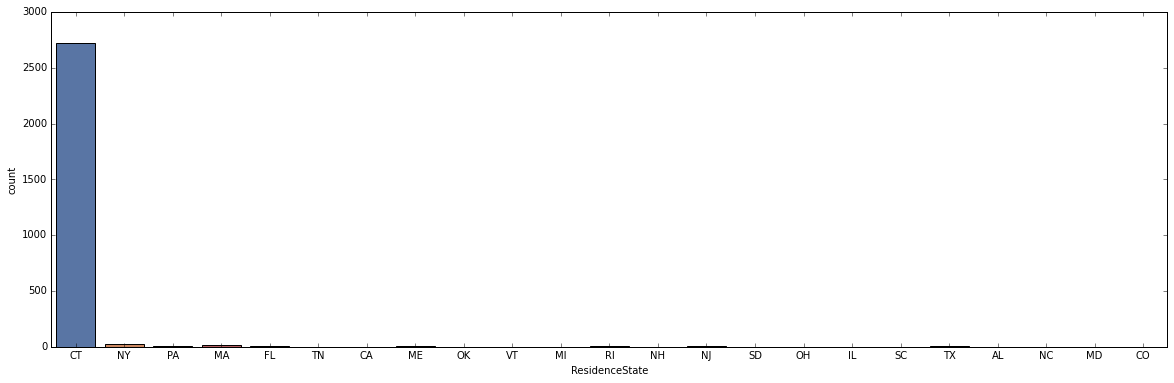

In [56]:
fig = plt.figure(figsize = (20, 6))
sns.countplot(x = 'ResidenceState',data = death_from_drugs, palette = 'deep' )

# **THANK YOU FOR VIEWING MY PROJECT!!!**